binary   | 0,1

raw count   | ft,d

term frequency   | total tf

log normalization   | log(1+ft,d)  #만약 스케일 크게 벌리고 싶다면 2쓰면된다함

double normalization  | 0.5 +0.5*ft,d/max tf


In [14]:
from math import log
tf1 = lambda tf:1 if tf>0 else 0
tf2 = lambda tf:tf
tf3 = lambda tf, ttf:tf/ttf
tf4 = lambda tf:log(1+tf)
tf5 = lambda tf, mtf, K=0.5:K+(1-K)*(tf/mtf)    

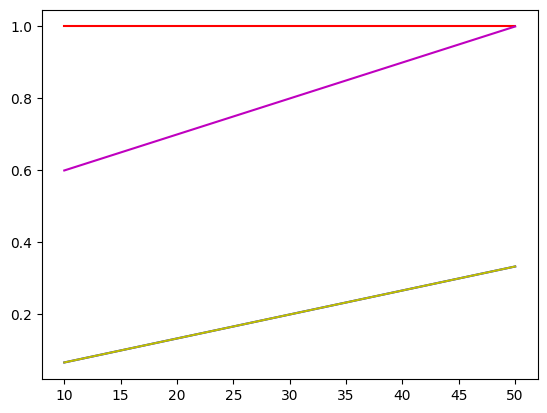

In [17]:

import matplotlib.pyplot as plt

TF = [10, 20, 30, 40, 50]
TTF = sum(TF)
MTF = max(TF)
plt.plot(TF, list(map(tf1, TF)), 'r-')
# plt.plot(TF, list(map(tf2, TF)), 'g-')
plt.plot(TF, list(map(tf3, TF, [TTF]*len(TF))), 'b-')
# plt.plot(TF, list(map(tf4, TF)), 'c-')
plt.plot(TF, list(map(tf5, TF, [MTF]*len(TF))), 'm-')
plt.plot(TF, list(map(tf5, TF, [TTF]*len(TF), [0]*len(TF))), 'y-')

### DF

In [4]:
idf1 = lambda df:1
idf2 = lambda df, N:log(N/df)
idf3 = lambda df, N:log(N/(1+df)) + 1
idf4 = lambda df, mdf:log(mdf/(1+df))
idf5 = lambda df, N:log((N-df)/df)

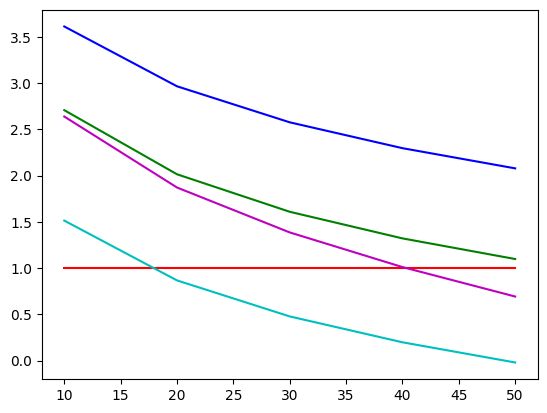

In [8]:
DF = [10, 20, 30, 40, 50]
N = sum(DF)
# N = max(DF) + 1
MDF = max(DF)

plt.plot(DF, list(map(idf1, DF)), 'r-')
plt.plot(DF, list(map(idf2, DF, [N]*len(DF))), 'g-')
plt.plot(DF, list(map(idf3, DF, [N]*len(DF))), 'b-')
plt.plot(DF, list(map(idf4, DF, [MDF]*len(DF))), 'c-')
plt.plot(DF, list(map(idf5, DF, [N]*len(DF))), 'm-')

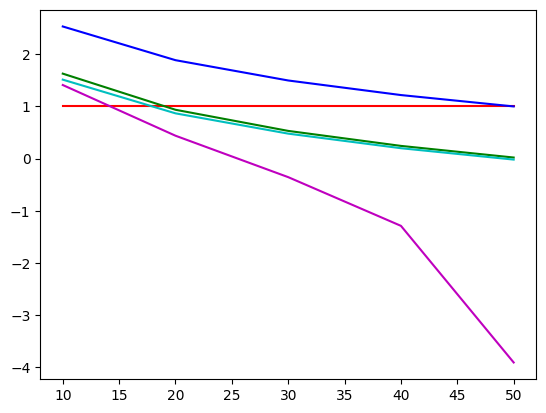

In [9]:
DF = [10, 20, 30, 40, 50]
# N = sum(DF)
N = max(DF) + 1
MDF = max(DF)

plt.plot(DF, list(map(idf1, DF)), 'r-')
plt.plot(DF, list(map(idf2, DF, [N]*len(DF))), 'g-')
plt.plot(DF, list(map(idf3, DF, [N]*len(DF))), 'b-')
plt.plot(DF, list(map(idf4, DF, [MDF]*len(DF))), 'c-')
plt.plot(DF, list(map(idf5, DF, [N]*len(DF))), 'm-')

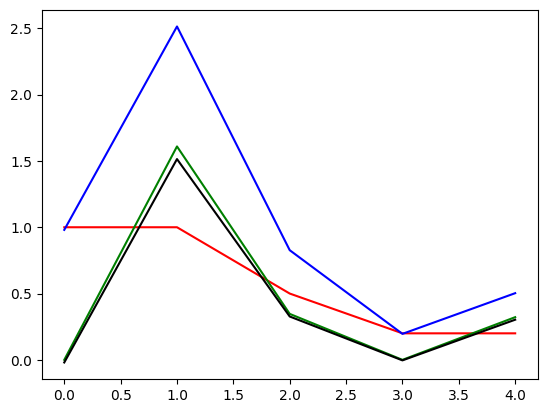

In [18]:
TF = [50, 50, 25, 10, 10]
DF = [50, 10, 25, 50, 10]

X = list(zip(TF,DF))
#위의 식 tf 1,3,5 와 idf 1,2,3,4 섞어볼건데, 조합이 너무 많으니 

# tf5 = lambda tf, mtf, K=0.5:K+(1-K)*(tf/mtf)    
# idf1 = lambda df:1
# idf2 = lambda df, N:log(N/df)
# idf3 = lambda df, N:log(N/(1+df)) + 1
# idf4 = lambda df, mdf:log(mdf/(1+df))

plt.plot(range(len(TF)), [tf5(tf, 50, 0)*idf1 (df) 
                              for tf, df in X], 'r-')
plt.plot(range(len(TF)), [tf5(tf, 50, 0)*idf2 (df, 50) 
                              for tf, df in X], 'g-')
plt.plot(range(len(TF)), [tf5(tf, 50, 0)*idf3 (df, 50) 
                              for tf, df in X], 'b-')
plt.plot(range(len(TF)), [tf5(tf, 50, 0)*idf4 (df, 50) 
                              for tf, df in X], 'k-')

In [19]:
#지금까지 벡터의 모양을 결정해주는 실습을 해봤다.
#이제는 벡터 모양 정해졌으니 similarity measure 를 어떻게 좋게 할지 알아볼거다. 

In [20]:
#위 과정을 코드로 표현해보겠다.
# 우리가 저장한건 Dictionary 와 Posting 구조이다. 

In [28]:
from struct import pack, unpack

In [26]:
import re
from os import listdir

p1 = re.compile(r'\s+')

D = list()
V = list()
TDM  = dict()


for file in fileids('naver'):
    i = len(D)
    D.append(file)
    with open(file, 'r', encoding='utf8') as fp:
        for t in regexp_tokenize(p1.sub(' ', fp.read()), r'\b\w+\b'):
            for g in ngram(t):
                if g not in V:
                    V.append(g)
                j = V.index(g)

                if j not in TDM.keys():
                    TDM[j] = list()

                if i not in TDM[j]:
                    #이 안에는 숫자들로만 구성되어있을거다
                    TDM[j].append(i)

In [31]:
i2w = lambda i:V[i]
w2i = lambda w:V.index(w)

i2d = lambda i:D[i]
d2i = lambda d:D.index(d)

In [33]:
import re
from nltk.tokenize import regexp_tokenize
from os import listdir
from struct import pack, unpack

def ngram(s, n=2):
    rst = list()
    for i in range(len(s)-(n-1)):
        rst.append(''.join(s[i:i+n]))
    return rst

def fileids(path, ext='txt'):
    files = list(filter(lambda f:re.search(f'{ext}$', f),
                       listdir(path)))
    return list(map(lambda f:f'{path}/{f}', files))

p1 = re.compile(r'\s+')

D = list() # {file:문서1, maxfreq:뭐고}, 문서, ...
V = list()
TDM = dict() # {term1:[위치, df]}

Posting = open('posting.dat', 'wb')
Posting.close()

for file in fileids('naver'):
    i = len(D)
    D.append({'filename':file, 'maxfreq':0})
    
    with open(file, 'r', encoding='utf8') as fp:
        corpus = fp.read()
        
    localTDM = dict()
    localPosting = open('local.dat', 'wb')

    # Tokenizing+Normalizing
    for t in regexp_tokenize(p1.sub(' ', corpus), r'\b\w+\b'):
        for g in ngram(t):
            # 문서 1개 작업하는 중에, 단어가 처음 등장
            if g not in localTDM.keys():
                pos = localPosting.tell()
                localPosting.write(pack('ii', 1, -1))
                localTDM[g] = pos
            else:
                pos = localPosting.tell()
                localPosting.write(pack('ii', 1, localTDM[g]))
                localTDM[g] = pos
                
    localPosting.close()
                
    # Update; Local -> Global
    Posting = open('posting.dat', 'ab')
    localPosting = open('local.dat', 'rb')
    
    # k=단어, v=파일위치
    maxFreq = 0
    for k, v in localTDM.items():
        if k not in V:
            V.append(k)
            
        j = V.index(k)
        
        freq = 0
        pos = v
        while pos != -1:
            localPosting.seek(pos)
            f, npos = unpack('ii', localPosting.read(8))
            pos = npos
            freq += 1
            
        if freq > maxFreq:
            maxFreq = freq
                
        if j not in TDM.keys():
            pos = Posting.tell()
            Posting.write(pack('iii', i, freq, -1))
            TDM[j] = {'fp':pos, 'df':1}
        else:
            pos = Posting.tell()
            Posting.write(pack('iii', i, freq, TDM[j]['fp']))
            TDM[j]['fp'] = pos
            TDM[j]['df'] += 1
            
    D[i]['maxfreq'] = maxFreq

    localPosting.close()
    Posting.close()

In [34]:
#잘 되는지 확인해보는 코드 
WDM = dict() #TDM 말고 따로 하나 만들어준거임.
Posting = open('posting.dat', 'rb')
Weighting = open('weighting.dat', 'wb')

for k, v in TDM.items():
    # k = 토큰
    # v = {fp:어디, df:몇개}
    fp = Weighting.tell() #웨이팅에서 현재 위치 말해줘
    WDM[k] = {'fp':fp, 'df':v['df']}

    pos = v['fp']        
    while pos != -1:
        Posting.seek(pos)
        i, freq, npos = unpack('iii', Posting.read(12))
        
        # tf5 = lambda tf, mtf, K=0.5:K+(1-K)*(tf/mtf)    
        # idf2 = lambda df, N:log(N/df)
        
        tf = tf5(freq, D[i]['maxfreq'], 0)
        idf = idf2(v['df'], len(D)) #collection C 의 길이 구해도 됨. 
        w = tf *idf
        Weighting.write(pack('if', i, w)) #어느 문서에서 얼만큼의 가중치를 가지더라. 몇 바이트냐?
        
        pos = npos

Posting.close()

In [35]:
WDM

{0: {'fp': 0, 'df': 21},
 1: {'fp': 168, 'df': 3},
 2: {'fp': 192, 'df': 2},
 3: {'fp': 208, 'df': 17},
 4: {'fp': 344, 'df': 27},
 5: {'fp': 560, 'df': 5},
 6: {'fp': 600, 'df': 8},
 7: {'fp': 664, 'df': 6},
 8: {'fp': 712, 'df': 31},
 9: {'fp': 960, 'df': 20},
 10: {'fp': 1120, 'df': 224},
 11: {'fp': 2912, 'df': 12},
 12: {'fp': 3008, 'df': 1},
 13: {'fp': 3016, 'df': 5},
 14: {'fp': 3056, 'df': 11},
 15: {'fp': 3144, 'df': 2},
 16: {'fp': 3160, 'df': 4},
 17: {'fp': 3192, 'df': 165},
 18: {'fp': 4512, 'df': 26},
 19: {'fp': 4720, 'df': 54},
 20: {'fp': 5152, 'df': 24},
 21: {'fp': 5344, 'df': 3},
 22: {'fp': 5368, 'df': 10},
 23: {'fp': 5448, 'df': 86},
 24: {'fp': 6136, 'df': 30},
 25: {'fp': 6376, 'df': 8},
 26: {'fp': 6440, 'df': 28},
 27: {'fp': 6664, 'df': 92},
 28: {'fp': 7400, 'df': 130},
 29: {'fp': 8440, 'df': 3},
 30: {'fp': 8464, 'df': 2},
 31: {'fp': 8480, 'df': 6},
 32: {'fp': 8528, 'df': 27},
 33: {'fp': 8744, 'df': 2},
 34: {'fp': 8760, 'df': 28},
 35: {'fp': 8984, '

In [38]:
#WDM 에서 단어 탐색해보기

query = '전손차량 중 확인되지 않는 차량이 4만여대에 달한다는 지적이 나왔다. 전손차량은 자동차가 완전히 파손됐거나 침수 등으로 수리할 수 없는 상태인 자동차와 발생한 손해액이 보험가액 이상인 자동차를 말한다.'

Weighting = open('weighting.dat', 'rb')

for t in regexp_tokenize(query, r'\b\w+\b'):
    for g in ngram(t): # ngram => tokenizing
        if g in V:
            j = w2i(g)
            
            n = 0
            while n < WDM[j]['df']:
                Weighting.seek(WDM[j]['fp']+n*8)
                i, w = unpack('if', Weighting.read(8))
                pos = npos
                n += 1
                
                print(f'{i}번째 문서, {j}번째 단어 {g}의 가중치 {w}')
            
Weighting.close()

385번째 문서, 2068번째 단어 차량의 가중치 1.0959545373916626
376번째 문서, 2068번째 단어 차량의 가중치 0.9025508165359497
362번째 문서, 2068번째 단어 차량의 가중치 0.0852409079670906
358번째 문서, 2068번째 단어 차량의 가중치 0.5682727098464966
357번째 문서, 2068번째 단어 차량의 가중치 0.7868391871452332
356번째 문서, 2068번째 단어 차량의 가중치 0.2557227313518524
344번째 문서, 2068번째 단어 차량의 가중치 0.3196534216403961
340번째 문서, 2068번째 단어 차량의 가중치 1.1365454196929932
321번째 문서, 2068번째 단어 차량의 가중치 2.0457818508148193
286번째 문서, 2068번째 단어 차량의 가중치 1.4612727165222168
280번째 문서, 2068번째 단어 차량의 가중치 0.23247520625591278
273번째 문서, 2068번째 단어 차량의 가중치 0.1065511405467987
272번째 문서, 2068번째 단어 차량의 가중치 0.0824912041425705
265번째 문서, 2068번째 단어 차량의 가중치 0.6393068432807922
263번째 문서, 2068번째 단어 차량의 가중치 0.6729545593261719
231번째 문서, 2068번째 단어 차량의 가중치 0.7306363582611084
230번째 문서, 2068번째 단어 차량의 가중치 0.3653181791305542
226번째 문서, 2068번째 단어 차량의 가중치 0.4262045621871948
212번째 문서, 2068번째 단어 차량의 가중치 0.24354545772075653
205번째 문서, 2068번째 단어 차량의 가중치 0.1967097967863083
185번째 문서, 2068번째 단어 차량의 가중치 0.3653181791305542
159번째 문서, 2